# Grifter Maps

In [1]:
"""
Update Parameters Here
"""
FILE = "Quaks"
ADDRESS = "0xd9d1c2623fbb4377d9bf29075e610a9b8b4805b4"  # set to "" if you want to print graphs for all addresses that minted more than MIN_TOKENS_MINTED
TOKEN_COL = "TOKEN_ID"
MIN_TOKENS_MINTED = 25

""" 
Optional parameters
Customise these values and set ZOOM_IN to True if you want to zoom in on a specific range
"""
ZOOM_IN = False

LOWER_BOUND = 0
UPPER_BOUND = 6000
TOP_N = 6000

In [2]:
"""
@author: mdigi14
"""

import pandas as pd
import matplotlib.pyplot as plt
import math
from typing import Optional

from honestnft_utils import config

"""
Plot params
"""
plt.rcParams.update({"figure.facecolor": "white", "savefig.facecolor": "white"})

"""
Helper Functions
"""


def print_graph(
    grifter_address: Optional[str],
    MINTING_DB: pd.DataFrame,
    RARITY_DB: pd.DataFrame,
    zoom_in: bool = False,
) -> None:
    if zoom_in:
        lower_bound = LOWER_BOUND
        upper_bound = UPPER_BOUND
        top_n = TOP_N
    else:
        # Count number of tokens in Rarity DB and round up to nearest 100
        TOKEN_COUNT = int(math.ceil(max(RARITY_DB[TOKEN_COL] / 100.0)) * 100)
        upper_bound = top_n = TOKEN_COUNT
        lower_bound = 0

    GRIFTER_DB = MINTING_DB[MINTING_DB["to_account"] == grifter_address]

    tokens_minted = GRIFTER_DB["TOKEN_ID"]
    rarity_ranks = GRIFTER_DB["rank"]

    if len(tokens_minted) >= MIN_TOKENS_MINTED or ADDRESS != "":

        if TOKEN_COL == "TOKEN_NAME":
            RARITY_DB["TOKEN_ID"] = (
                RARITY_DB["TOKEN_NAME"].str.split("#").str[1].astype(int)
            )

        RARITY_DB = RARITY_DB.sort_values("TOKEN_ID")

        ax = RARITY_DB.plot.scatter(
            x="TOKEN_ID",
            y="Rank",
            grid=True,
            alpha=0.25,
            title="{} - {}".format(FILE, grifter_address),
            figsize=(14, 7),
        )
        plt.scatter(x=tokens_minted, y=rarity_ranks, color="black", s=55)

        ax.set_xlabel("Token ID")
        ax.set_ylabel("Rarity Rank")
        plt.xlim(lower_bound, upper_bound)
        plt.ylim(0, top_n)
        plt.show()

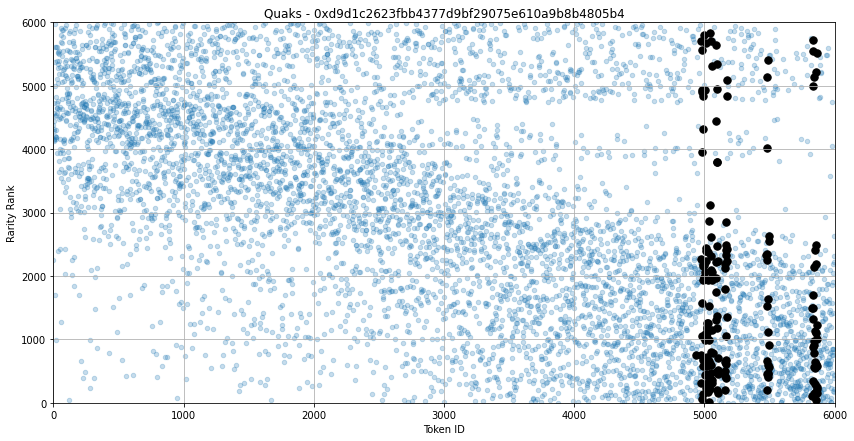

In [3]:
"""
Generate Plot
"""

PATH = f"{config.RARITY_FOLDER}/{FILE}_raritytools.csv"
MINT_PATH = f"{config.MINTING_FOLDER}/{FILE}_minting.csv"

RARITY_DB = pd.read_csv(PATH)
RARITY_DB = RARITY_DB[RARITY_DB["TOKEN_ID"].duplicated() == False]
MINTING_DB = pd.read_csv(MINT_PATH)

addresses = set(MINTING_DB["to_account"].unique())

if ADDRESS != "":
    print_graph(ADDRESS, MINTING_DB, RARITY_DB, zoom_in=ZOOM_IN)
else:
    for address in addresses:
        print(f"Grifter address: {address}")
        print_graph(address, MINTING_DB, RARITY_DB, zoom_in=ZOOM_IN)

Grifter address: 0xd9d1c2623fbb4377d9bf29075e610a9b8b4805b4


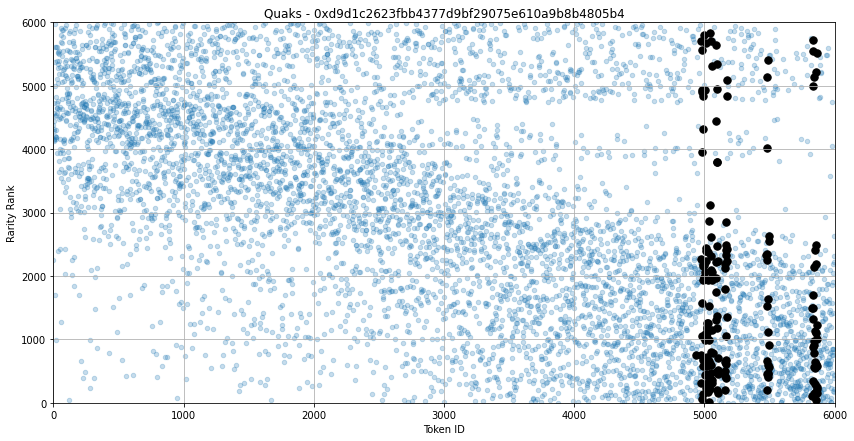

Grifter address: 0x0008d343091ef8bd3efa730f6aae5a26a285c7a2


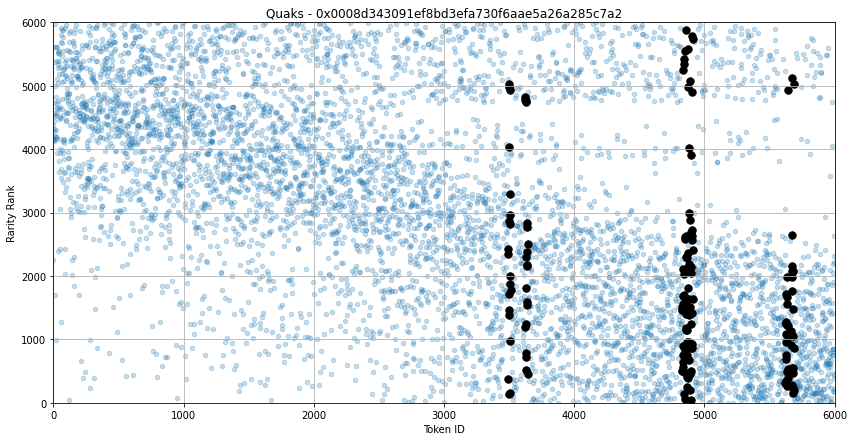

Grifter address: 0xb9b6856efd128294a912d584366448bc3d4ea979


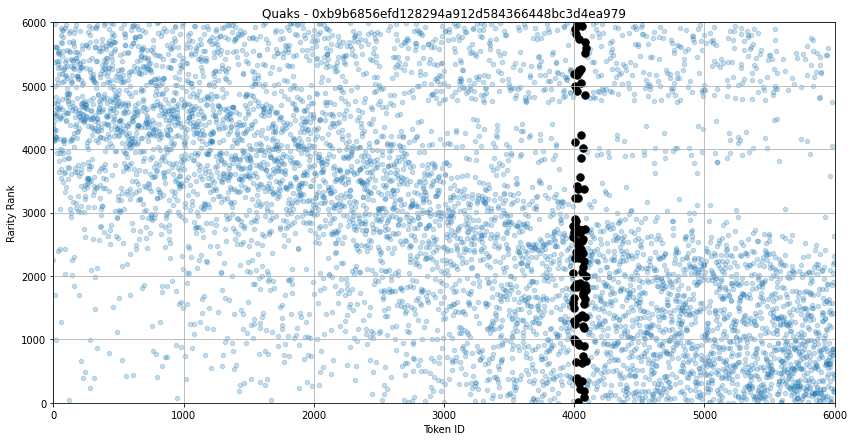

Grifter address: 0xcd55ac0917fc01fb05600524c7980567d3aff8d5


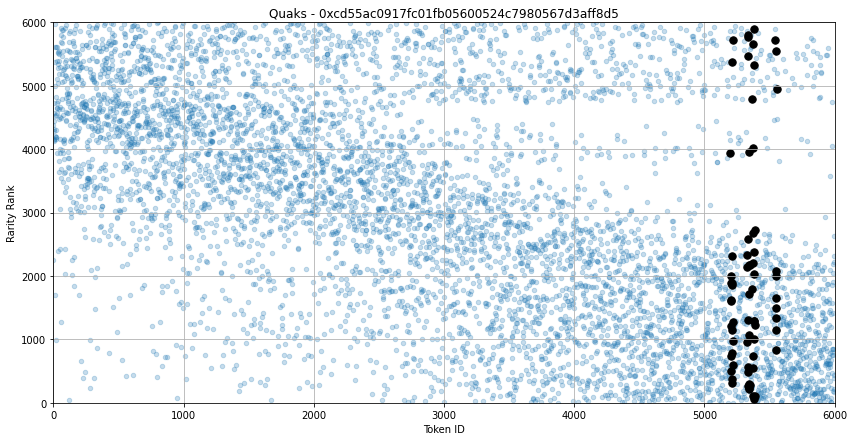

Grifter address: 0x955807f8cb79c3a0f4f1e20a8eb336c51d37e5ca


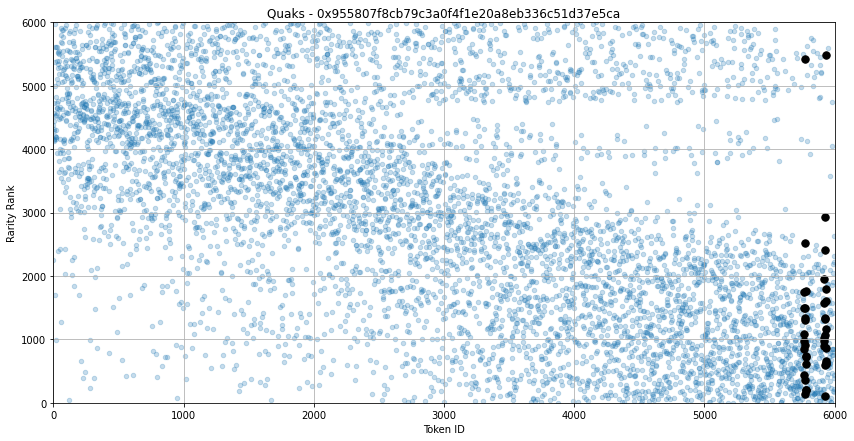

Grifter address: 0xa4e107af951156c7acc6b4dd714d14f444342a12


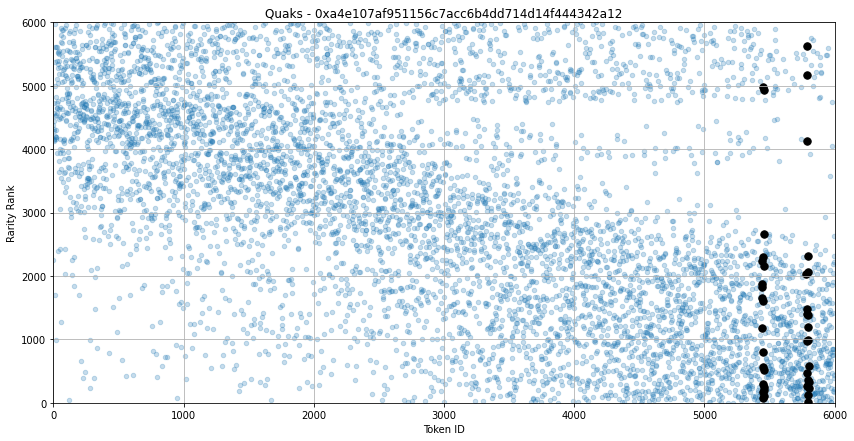

Grifter address: 0x2e2370489903d7ed48f4cdc00322cd66a4757723


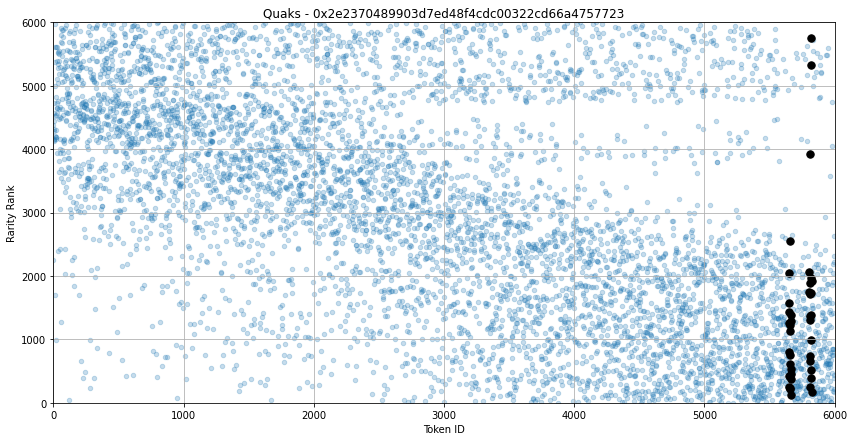

Grifter address: 0xe63fed8d441ee8128eaa583549dcb60df4f4f109


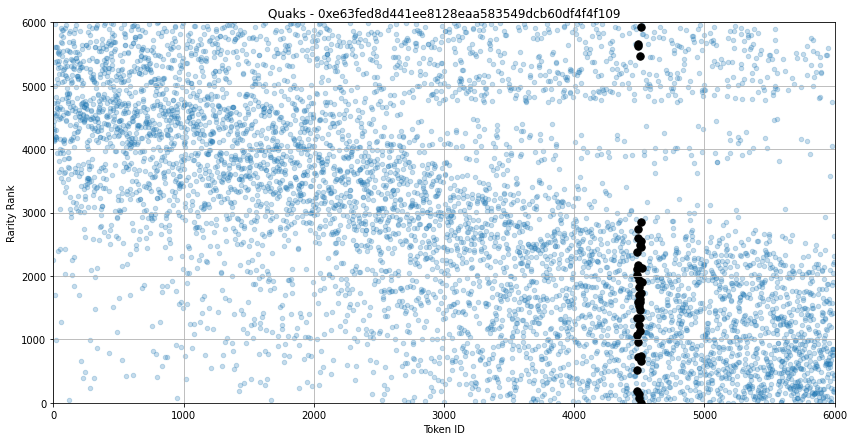

Grifter address: 0xce3730b98c60a594466a0e6cb057162c36954024


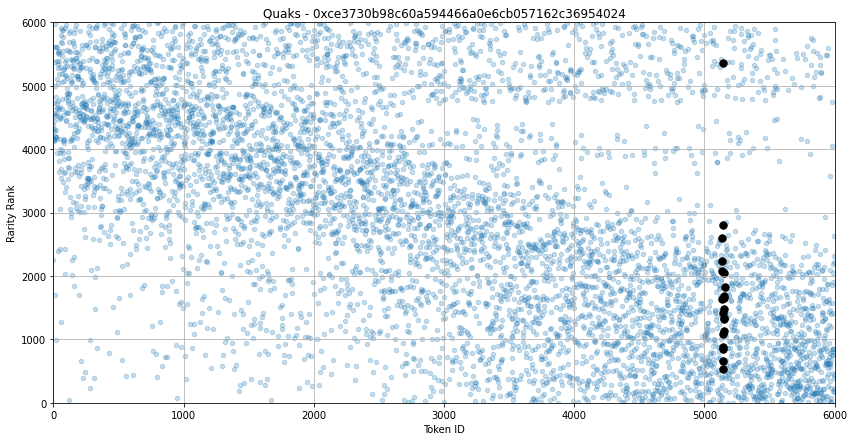

Grifter address: 0x4a9a34a36faedeab457344dea77228dcd318adff


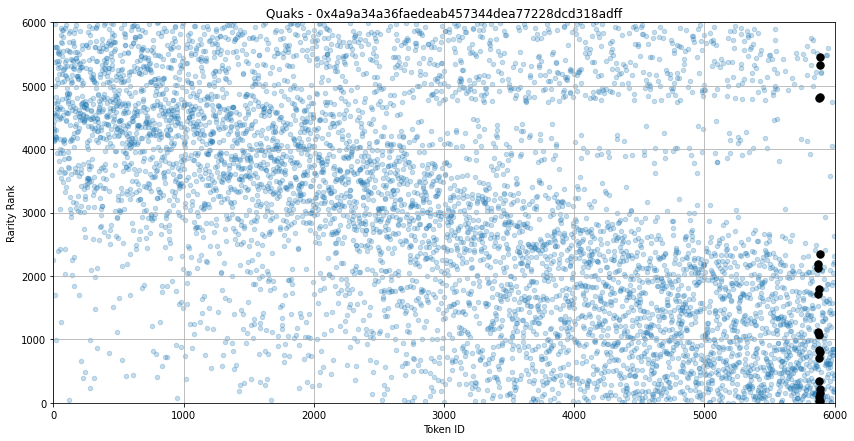

Grifter address: 0xa635a54b4305d786db7a2cb3a1c8bc90bb15123e


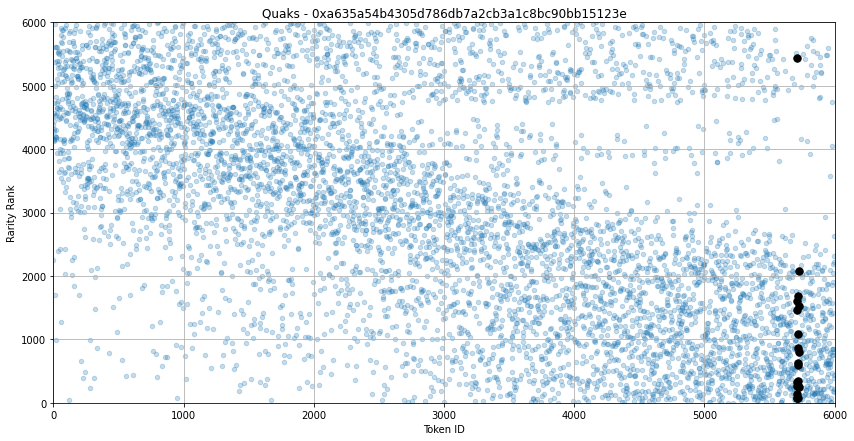

Grifter address: 0xafe7309fd01a5e6d5a258e911461ecb9558fbfdf


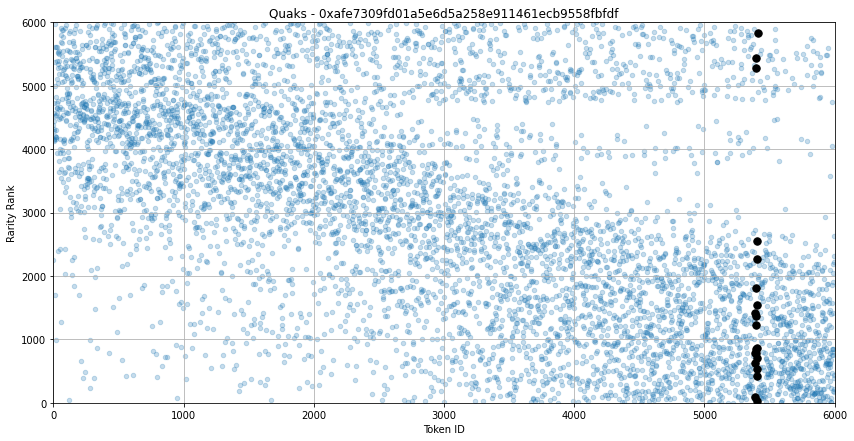

Grifter address: 0x3e8d3cbcc30a5ae702ac5d9537992b154151e93b


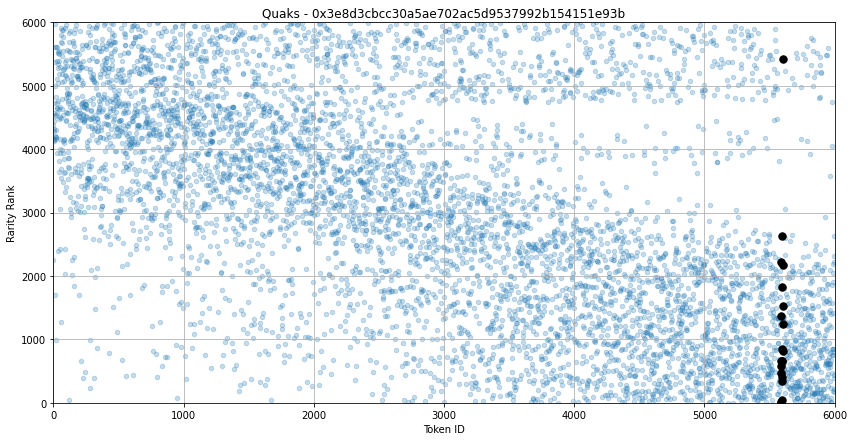

Grifter address: 0xd3fa40b89a890d97ff76986096809620d4622417


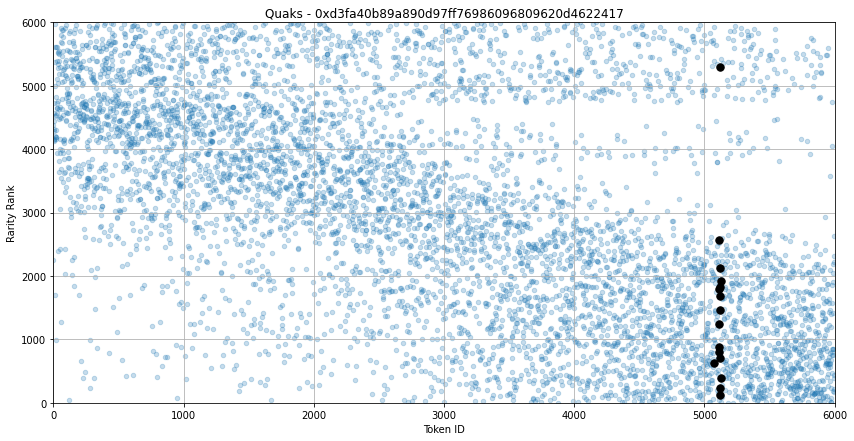

Grifter address: 0xf83defe97102b583671377cc444c92c32bcbc59b


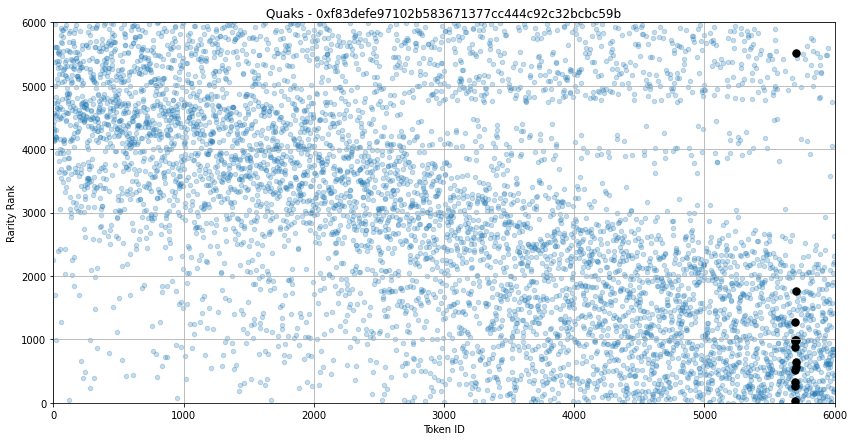

Grifter address: 0xdf0c54cbe7b4f59f8dd5bab213db30bbe4de2988


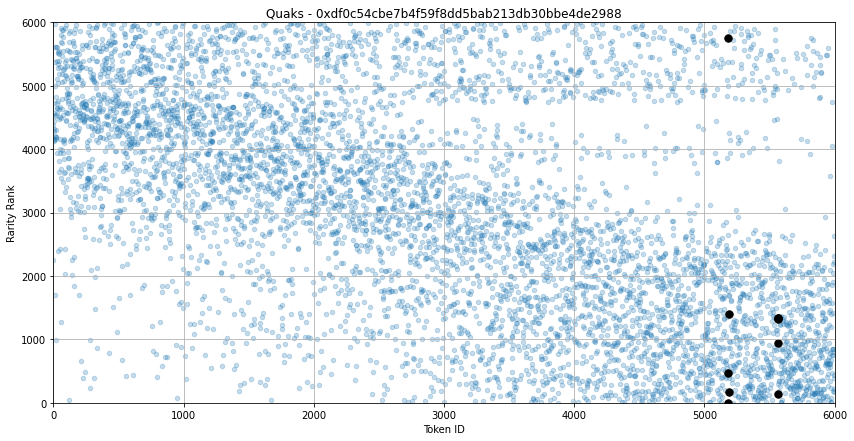

Grifter address: 0x9e0e57de9cac0e9c489c080a0c07ff6e42ae12d1


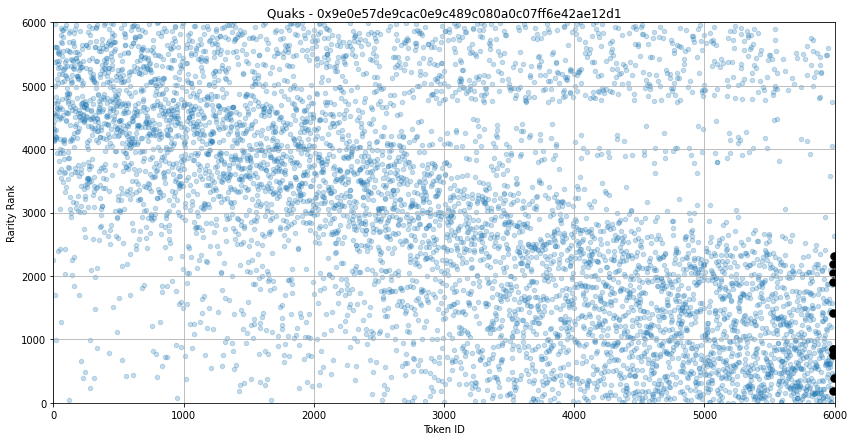

Grifter address: 0xa684cfc51bf2d794cf197c35f3377f117bf10b6f


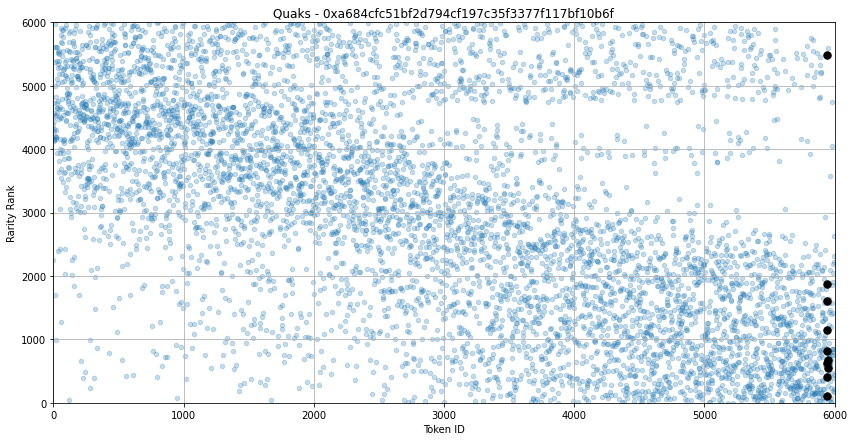

Grifter address: 0x0f5a6308b00e00137d7213c2659a18c357c6ec61


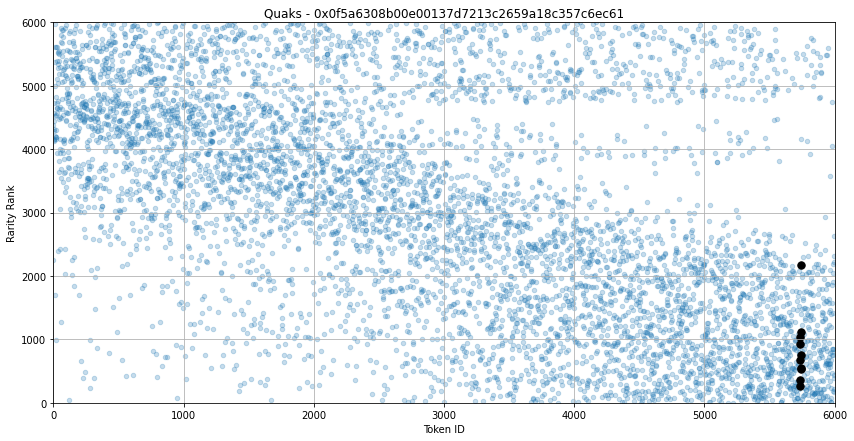

Grifter address: 0x8e05bd9fa3059ec69c15bc1a6f4d94f0ac26ce00


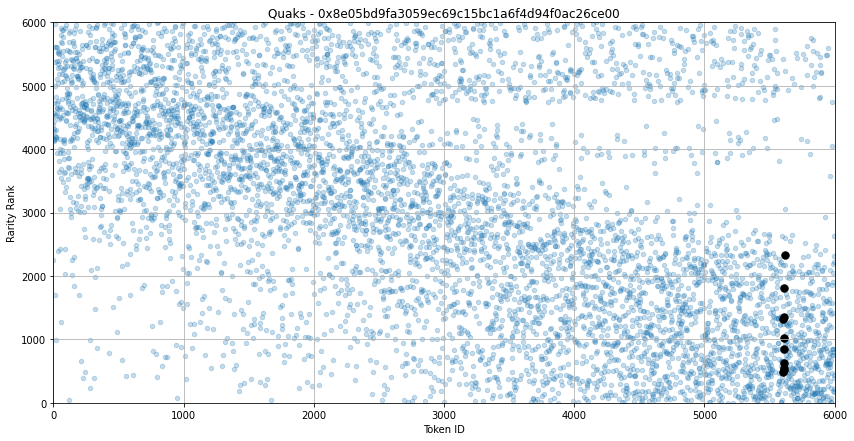

Grifter address: 0xcea110cf871ba2f88262aaba1026c371da930a51


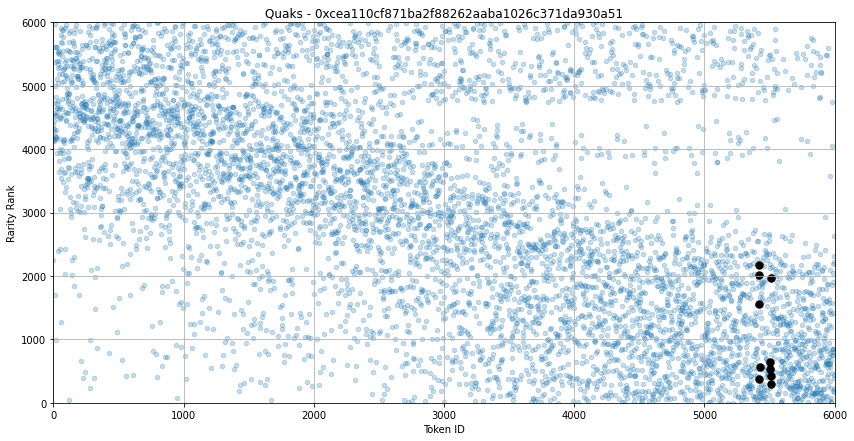

Grifter address: 0xb9ee84826d802beb4260e5fedbdbaf6c1125a148


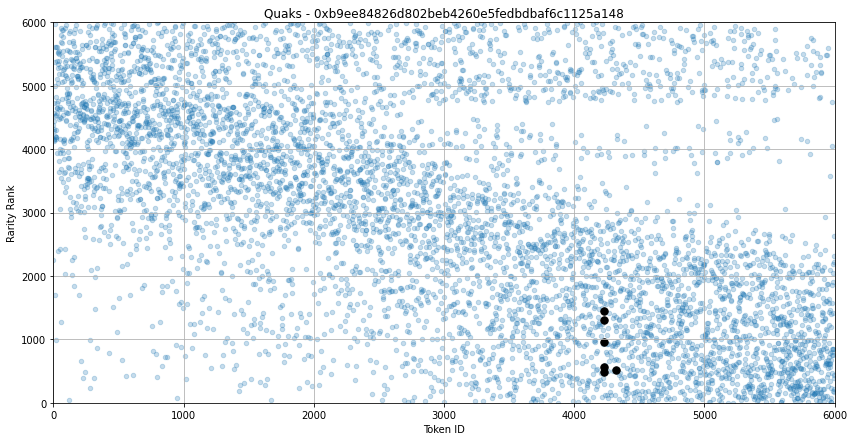

Grifter address: 0xb3e0f20fe73ffb0c011d9afa10ee0521d6678619


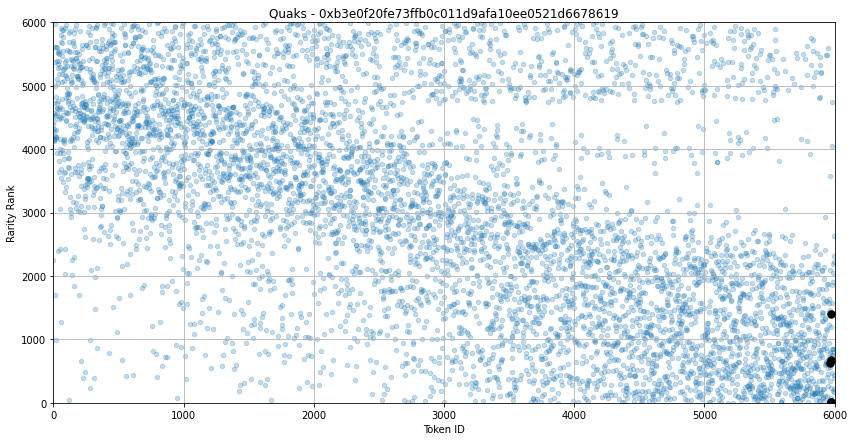

Grifter address: 0x0653502fce854ea6074424105567534719f25587


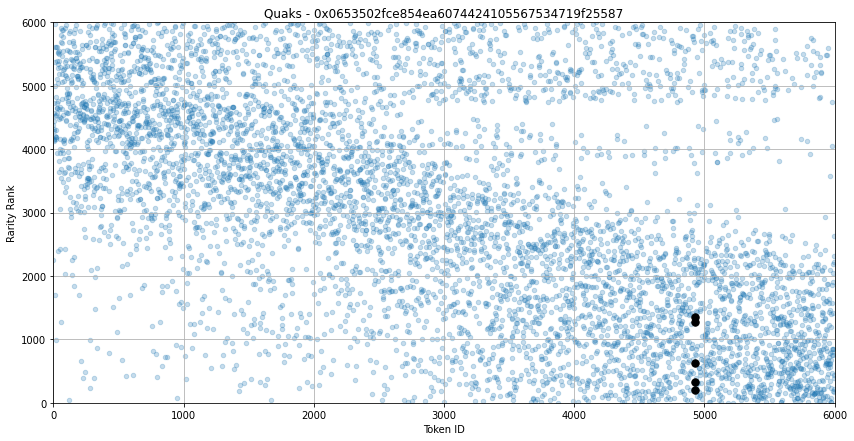

Grifter address: 0xfdc3e8edd74a90fe971ef7d56a0c66c870b10f5d


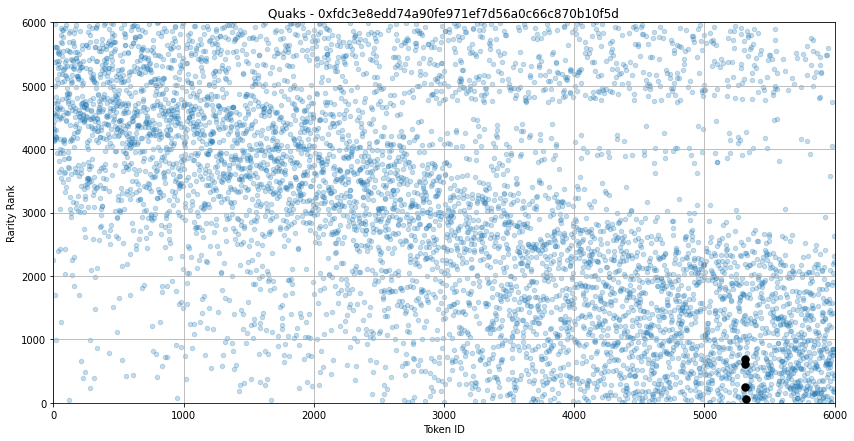

Grifter address: 0x0bab9a5ca29727b112cd5dce487a89fd6b7366bd


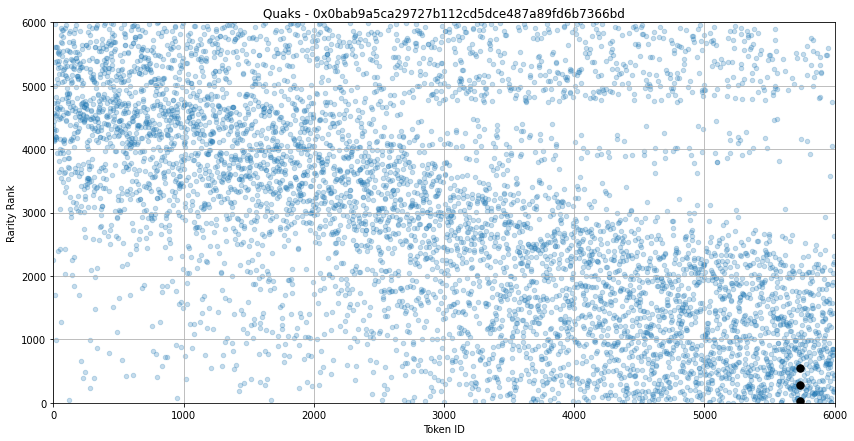

In [4]:
"""
Generate plot for each grifter in collection
"""

PATH = f"{config.RARITY_FOLDER}/{FILE}_raritytools.csv"
MINT_PATH = f"{config.MINTING_FOLDER}/{FILE}_minting.csv"
GRIFTER_PATH = f"{config.GRIFTERS_DATA_FOLDER}/{FILE}_grifters.csv"

RARITY_DB = pd.read_csv(PATH)
RARITY_DB = RARITY_DB[RARITY_DB["TOKEN_ID"].duplicated() == False]
MINTING_DB = pd.read_csv(MINT_PATH)
GRIFTERS_DATA = pd.read_csv(GRIFTER_PATH)

for ADDRESS in GRIFTERS_DATA["address"]:
    print(f"Grifter address: {ADDRESS}")
    print_graph(ADDRESS, MINTING_DB, RARITY_DB, zoom_in=ZOOM_IN)